In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams['figure.dpi'] = 180
plt.rcParams['font.size'] = 8

In [3]:
rawdata = pd.read_csv('owid-covid-data.csv')

In [4]:
rawdata

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181219,ZWE,Africa,Zimbabwe,2022-04-19,247297.0,0.0,29.000,5464.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
181220,ZWE,Africa,Zimbabwe,2022-04-20,247336.0,39.0,25.143,5466.0,2.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
181221,ZWE,Africa,Zimbabwe,2022-04-21,247383.0,47.0,25.000,5467.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
181222,ZWE,Africa,Zimbabwe,2022-04-22,247488.0,105.0,35.857,5468.0,1.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [5]:
data = rawdata[(rawdata['iso_code'] == 'RUS') & (rawdata['date'] > '2020-03-02')].reset_index(drop=True)

In [6]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,RUS,Europe,Russia,2020-03-03,3.0,0.0,0.143,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
1,RUS,Europe,Russia,2020-03-04,3.0,0.0,0.143,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
2,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
3,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
4,RUS,Europe,Russia,2020-03-07,13.0,0.0,1.571,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,RUS,Europe,Russia,2022-04-19,17829009.0,8523.0,10403.714,366436.0,227.0,236.714,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
778,RUS,Europe,Russia,2022-04-20,17838087.0,9078.0,10046.714,366654.0,218.0,230.857,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
779,RUS,Europe,Russia,2022-04-21,17846818.0,8731.0,9698.571,366845.0,191.0,222.857,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
780,RUS,Europe,Russia,2022-04-22,17855661.0,8843.0,9350.000,367036.0,191.0,213.714,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN


In [7]:
x = np.arange(len(data['new_cases']))
y1 = data['total_cases'].to_numpy()
y2 = data['new_cases'].to_numpy()
y2[np.where(y2 == 0)] = 1

In [8]:
def bayesian_update(x,y,n,d):
    
    #начальные параметры w
    sigma_w = np.eye(d+1)
    mu_w = np.array([1 for i in range(d+1)])

    #считаем sigma и mu
    for i in range(1,n):
        
        x_n = x[:i]
        y_n = y[:i]
        
        #дисперсия шума 
        sigma_noise = np.std(mu_w[0] + mu_w[1]*x_n - np.log(y_n))
        if i == 1: sigma_noise = 1
        
        #"полиномиирование" x
        x_n = np.array([x[:i]**j for j in range(d+1)]).T
        
        #пересчёт параметров
        sigma_n = np.linalg.inv((np.linalg.inv(sigma_w) + (sigma_noise**-2)*x_n.T@x_n))
        mu_n = sigma_n@(np.linalg.inv(sigma_w)@mu_w + (sigma_noise**-2)*x_n.T@np.log(y_n))
        
        sigma_w,mu_w = sigma_n,mu_n
    
    return mu_w,sigma_w,sigma_noise

In [9]:
def do_sample(n,mu,sigma):
    return np.random.multivariate_normal(mu,sigma,n)

# Экспоненциальная модель

In [10]:
mu,sigma,sigma_noise = bayesian_update(x,y2,50,1)

In [11]:
mu,sigma,sigma_noise

(array([0.00605196, 0.20550504]),
 array([[ 9.14255988e-04, -3.66782891e-05],
        [-3.66782891e-05,  2.27347664e-06]]),
 0.6477239440623038)

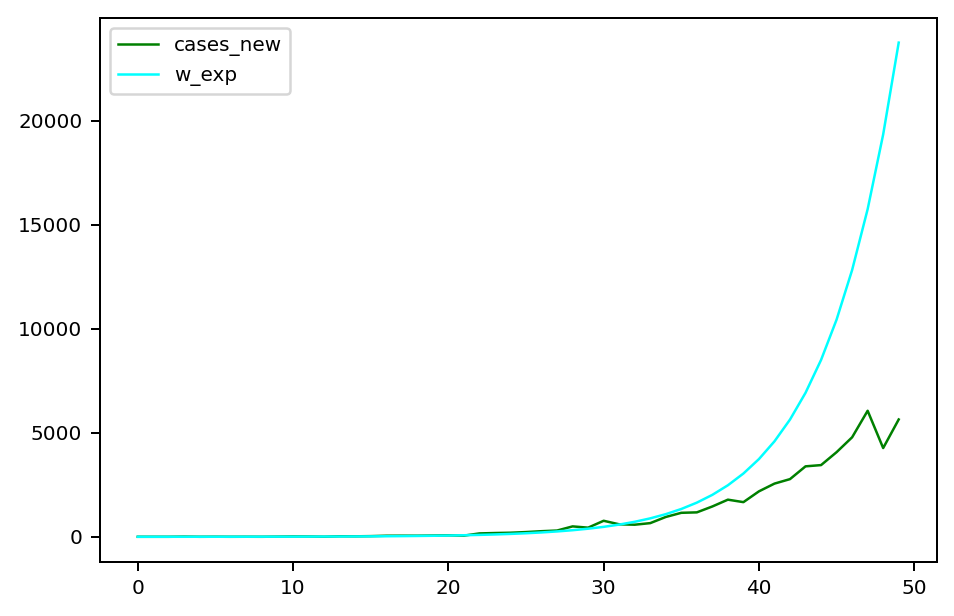

In [12]:
plt.plot(y2[:50],color='green',linewidth=1)
plt.plot(np.exp(mu[0] + mu[1]*x[:50]),color='cyan',linewidth=1)
plt.legend(['cases_new','w_exp'])
plt.show()

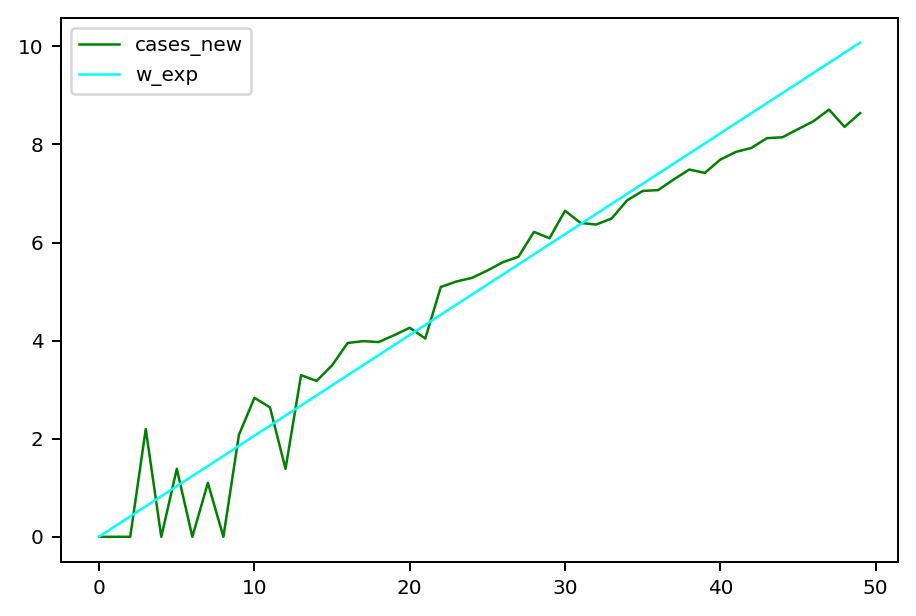

In [13]:
plt.plot(np.log(y2[:50]),color='green',linewidth=1)
plt.plot(mu[0] + mu[1]*x[:50],color='cyan',linewidth=1)
plt.legend(['cases_new','w_exp','regression'])
plt.show()

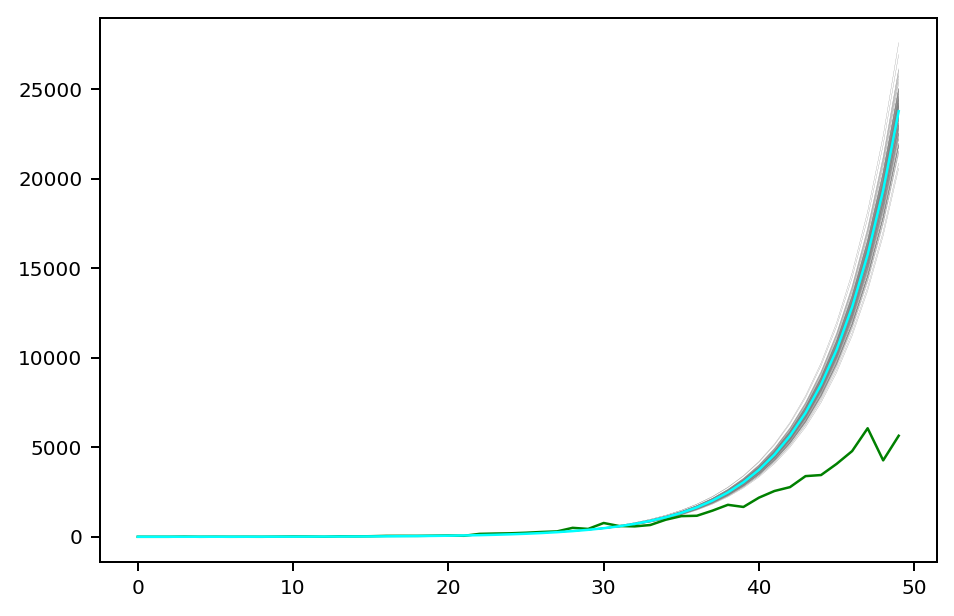

In [14]:
for s in do_sample(100,mu,sigma):
    plt.plot(np.exp(s[0] + s[1]*x[:50]),color = 'gray',linewidth = 0.1)
    
plt.plot(y2[:50],color='green',linewidth=1)
plt.plot(np.exp(mu[0] + mu[1]*x[:50]),color='cyan',linewidth=1)

plt.show()

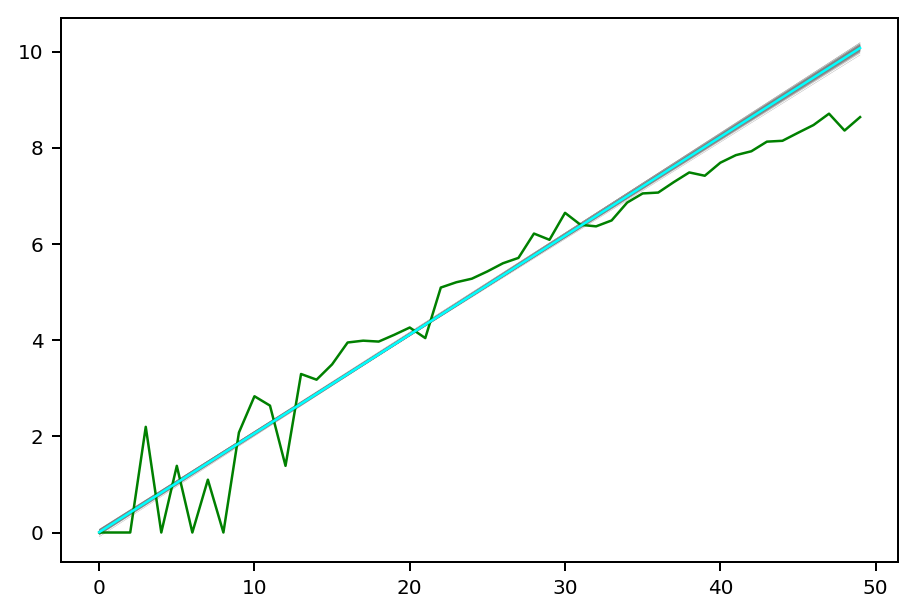

In [15]:
for s in do_sample(100,mu,sigma):
    plt.plot(s[0] + s[1]*x[:50],color = 'gray',linewidth = 0.1)
    
plt.plot(np.log(y2[:50]),color='green',linewidth=1)
plt.plot(mu[0] + mu[1]*x[:50],color='cyan',linewidth=1)

plt.show()

Модель гауссиан

In [16]:
mu,sigma,sigma_noise = bayesian_update(x,y2,50,2)

In [17]:
mu,sigma,sigma_noise

(array([-0.27779462,  0.25751216, -0.00135707]),
 array([[ 1.47647961e-03, -1.59168371e-04,  3.43134813e-06],
        [-1.59168371e-04,  3.11324228e-05, -8.18964977e-07],
        [ 3.43134813e-06, -8.18964977e-07,  2.39091155e-08]]),
 1.1360589616423684)

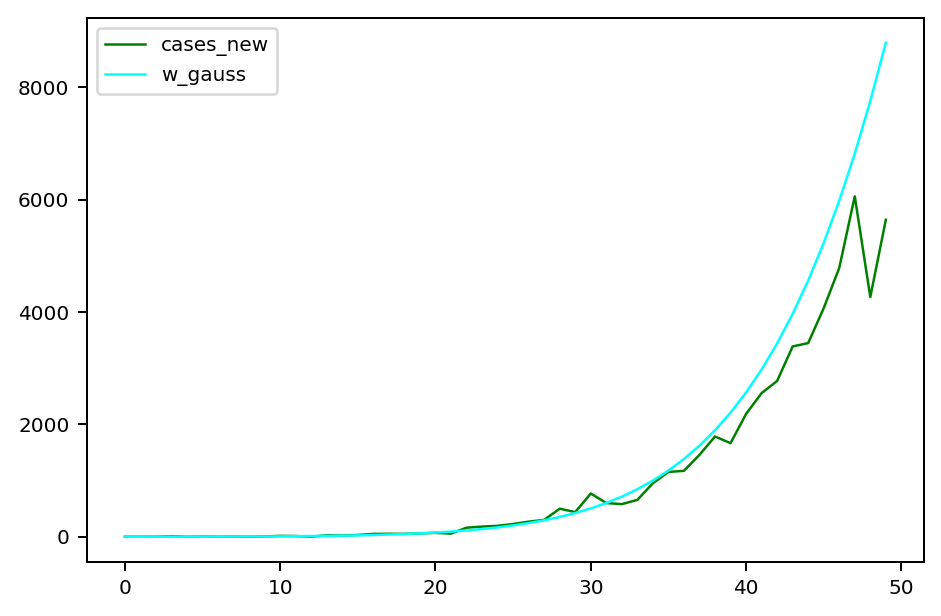

In [18]:
plt.plot(y2[:50],color='green',linewidth=1)
plt.plot(np.exp(mu[0] + mu[1]*x[:50] + mu[2]*x[:50]**2),color='cyan',linewidth=1)
plt.legend(['cases_new','w_gauss'])
plt.show()

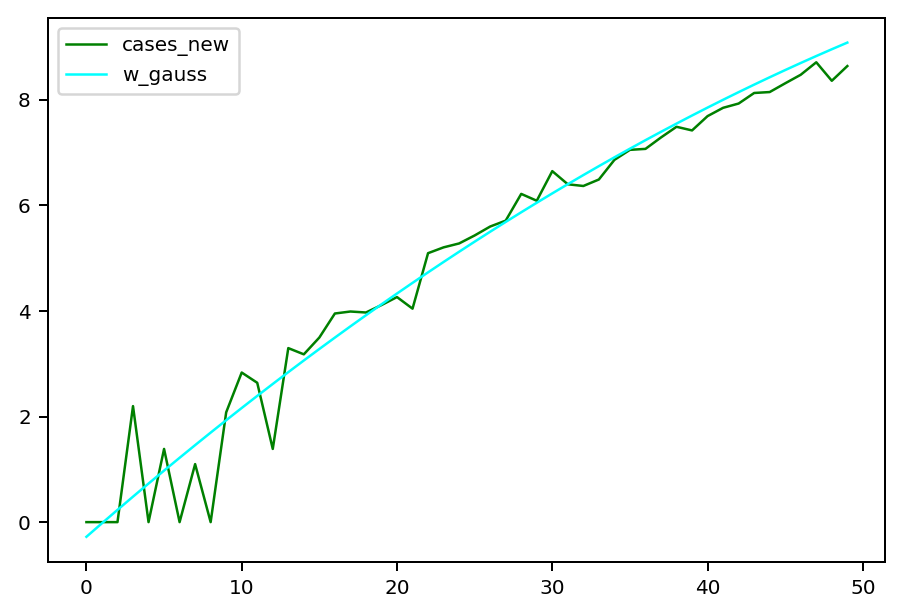

In [19]:
plt.plot(np.log(y2[:50]),color='green',linewidth=1)
plt.plot(mu[0] + mu[1]*x[:50] + mu[2]*x[:50]**2,color='cyan',linewidth=1)
plt.legend(['cases_new','w_gauss'])
plt.show()

### Обучаю на 100 днях, посмотрим предсказание и реальность на 365, заодно посэплируем.

In [20]:
mu,sigma,sigma_noise = bayesian_update(x,y2,100,2)

In [21]:
mu,sigma,sigma_noise

(array([-0.3493711 ,  0.2761929 , -0.00193482]),
 array([[ 1.09884362e-03, -7.48646692e-05,  9.76344322e-07],
        [-7.48646692e-05,  8.90109691e-06, -1.44617854e-07],
        [ 9.76344322e-07, -1.44617854e-07,  2.81157572e-09]]),
 5.549647575582819)

In [22]:
sample = do_sample(1000,mu,sigma)

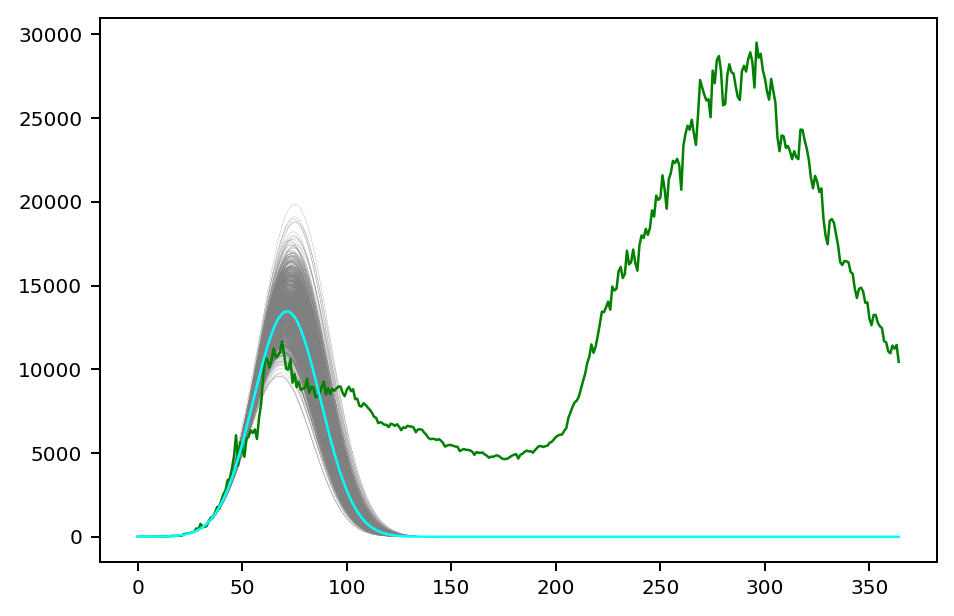

In [23]:
for s in sample:
    plt.plot(np.exp(s[0] + s[1]*x[:365] + s[2]*x[:365]**2),color = 'gray',linewidth = 0.1)
    
plt.plot(y2[:365],color='green',linewidth=1)
plt.plot(np.exp(mu[0] + mu[1]*x[:365] + mu[2]*x[:365]**2),color='cyan',linewidth=1)

plt.show()

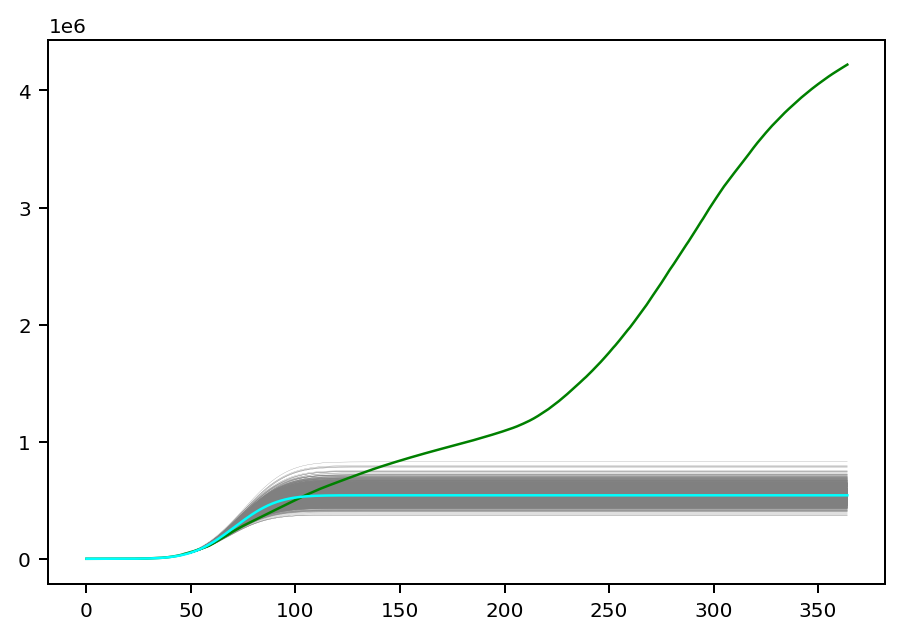

In [24]:
for s in sample:
    plt.plot(np.cumsum(np.exp(s[0] + s[1]*x[:365] + s[2]*x[:365]**2)),color = 'gray',linewidth = 0.1)
    
plt.plot(y1[:365],color='green',linewidth=1)
plt.plot(np.cumsum(np.exp(mu[0] + mu[1]*x[:365] + mu[2]*x[:365]**2)),color='cyan',linewidth=1)

plt.show()

### Оптимистичный прогноз. А если обучить на 200 днях и заглянуть на год вперёд? 

In [25]:
mu,sigma,sigma_noise = bayesian_update(x,y2,200,2)

In [26]:
sample = do_sample(1000,mu,sigma)

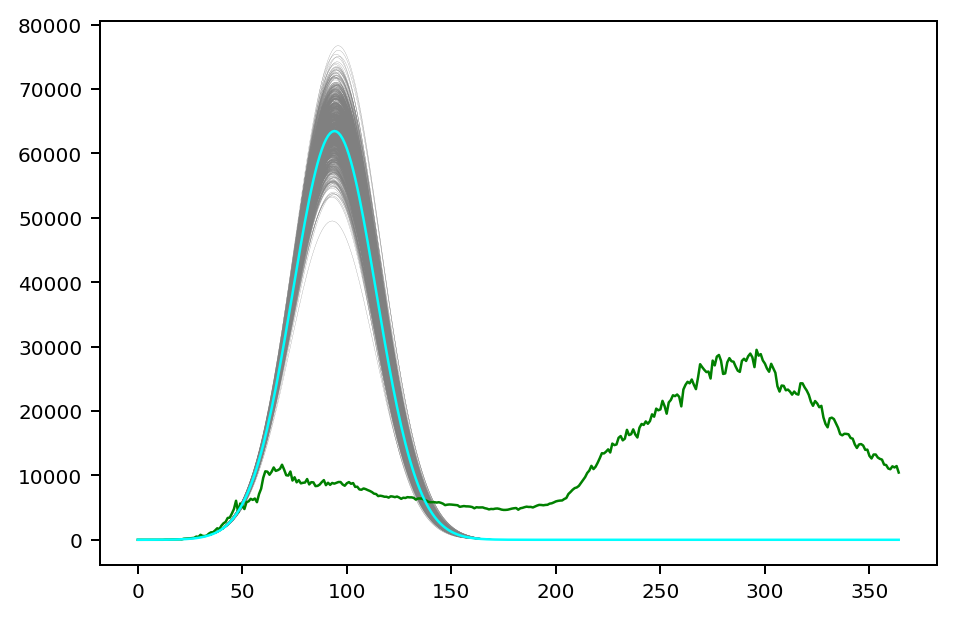

In [27]:
for s in sample:
    plt.plot(np.exp(s[0] + s[1]*x[:365] + s[2]*x[:365]**2),color = 'gray',linewidth = 0.1)
    
plt.plot(y2[:365],color='green',linewidth=1)
plt.plot(np.exp(mu[0] + mu[1]*x[:365] + mu[2]*x[:365]**2),color='cyan',linewidth=1)

plt.show()

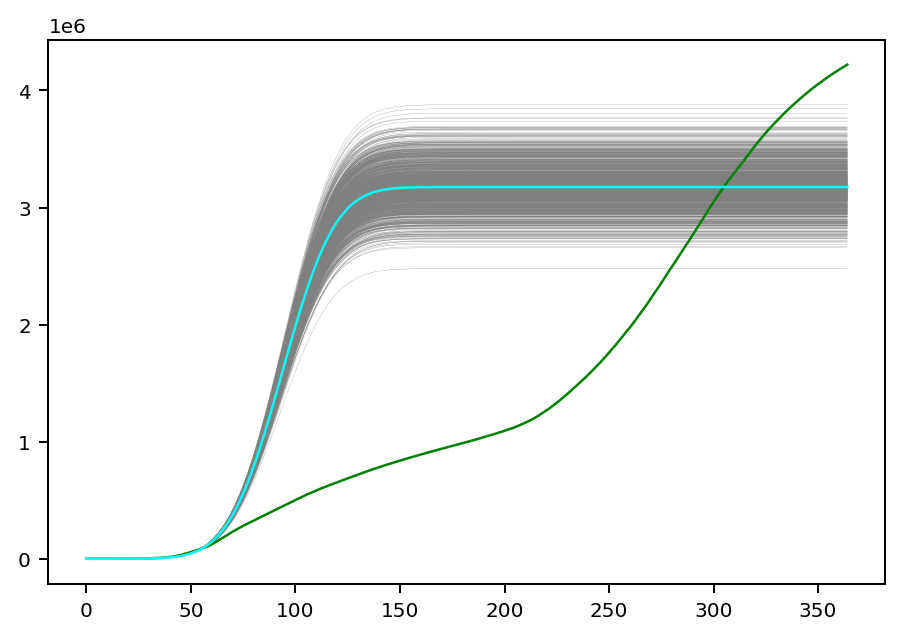

In [28]:
for s in sample:
    plt.plot(np.cumsum(np.exp(s[0] + s[1]*x[:365] + s[2]*x[:365]**2)),color = 'gray',linewidth = 0.1)
    
plt.plot(y1[:365],color='green',linewidth=1)
plt.plot(np.cumsum(np.exp(mu[0] + mu[1]*x[:365] + mu[2]*x[:365]**2)),color='cyan',linewidth=1)

plt.show()

In [29]:
ss = [np.cumsum(np.exp(s[0] + s[1]*x[:365] + s[2]*x[:365]**2))[364] for s in sample]
ss.sort()

In [30]:
print(f'Персентили: 10% - {int(ss[int(1*len(sample)/10)])},\t90% - {int(ss[int(9*len(sample)/10)])}')

Персентили: 10% - 2925252,	90% - 3461909


#### new_cases сильно завышен по построению модели, зато total_cases по итогу года попали почти куда надо 